In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df.info()

In [4]:
df = pd.read_csv('data/Sales.csv')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df.Date.dt.isocalendar().week
df['WeekDay'] = df.Date.dt.day_name()


In [6]:
df.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Week,WeekDay
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,48,Tuesday
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,48,Thursday
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,12,Sunday


In [7]:
grp_weekday = df[['WeekDay', 'Profit']].groupby(['WeekDay'])
grp_age_group = df[['Age_Group', 'Profit']].groupby(['Age_Group'])

In [22]:
grp_age_group.median()

,Profit
Age_Group,
Adults (35-64),111.0
Seniors (64+),76.5
Young Adults (25-34),113.0
Youth (<25),71.0


In [9]:
group_country = df.groupby(['Country'])


In [11]:
Weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

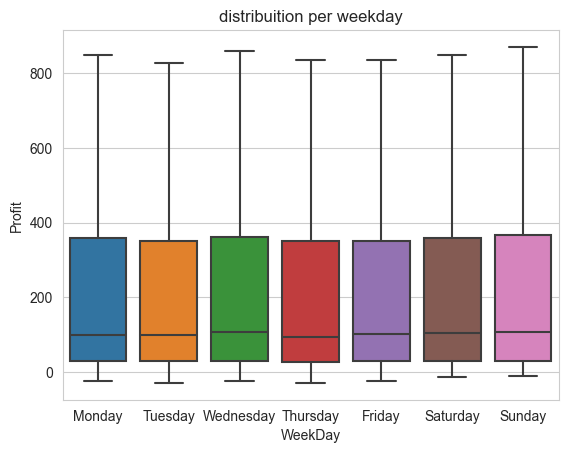

In [24]:
g = sns.boxplot(data=df,
                x= 'WeekDay',
                y= 'Profit',
                order= Weekday_order,
                showfliers= False)
g.set_title('distribuition per weekday');

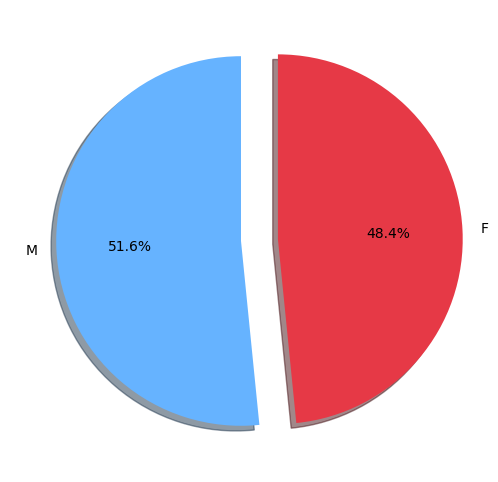

In [13]:
df_gender = df['Customer_Gender'].value_counts()

label = [df_gender.index.tolist()]
plt.pie(df_gender, labels=label[0], shadow=True, explode=(0.0, 0.2), colors=['#66b3ff','#E63946'], autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

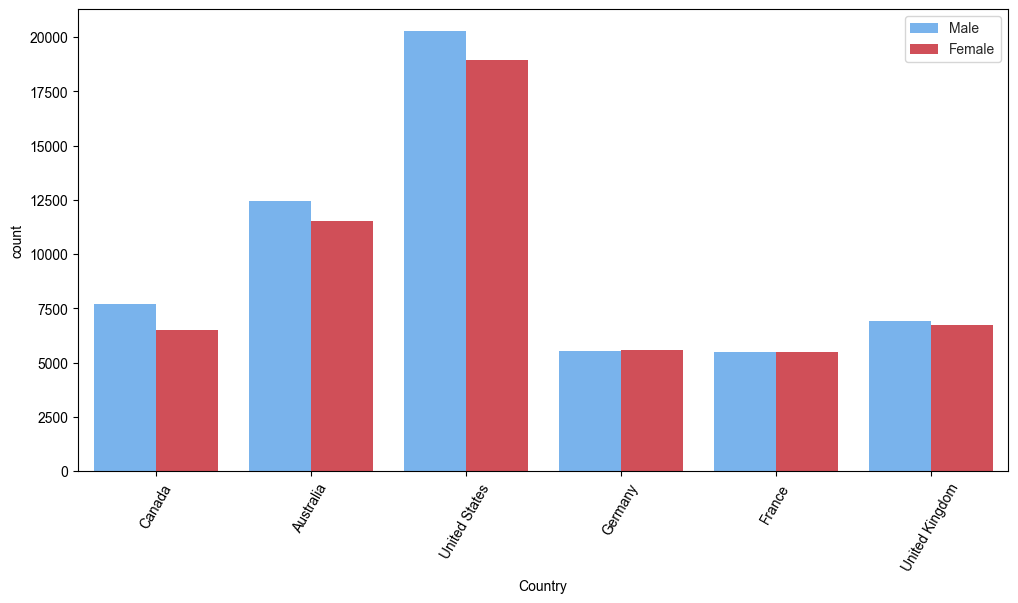

In [14]:
sns.countplot(data = df, x='Country', hue='Customer_Gender', palette=['#66b3ff','#E63946'])
plt.xticks(rotation=60)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(12,6)
plt.show()

In [15]:
grp_month = df[['Month', 'Profit', 'Customer_Gender']].groupby(['Month'])

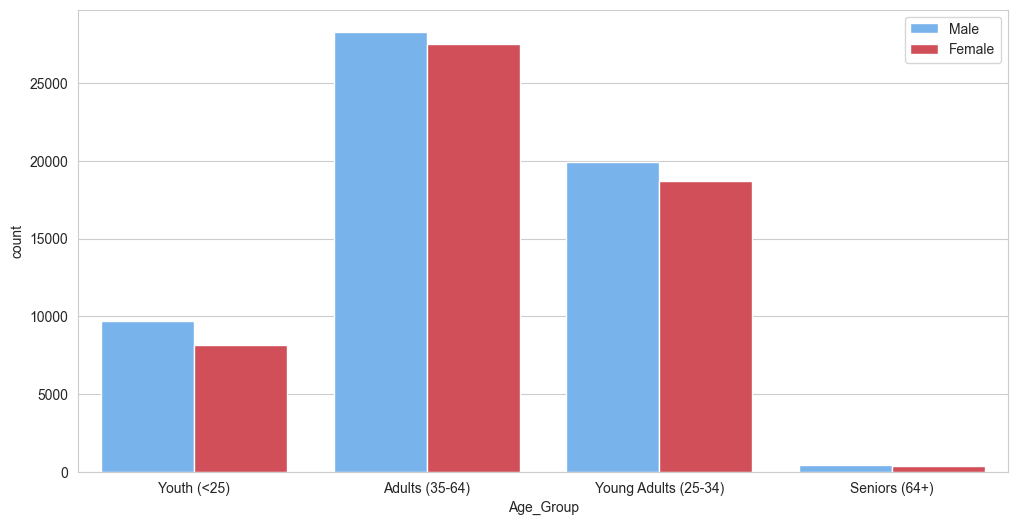

In [16]:
sns.countplot(data = df, x='Age_Group', hue='Customer_Gender', palette=['#66b3ff','#E63946'])
plt.xticks(rotation=0)
sns.set_style("whitegrid")
plt.legend(['Male', 'Female'])
plt.gcf().set_size_inches(12,6)
plt.show()

In [17]:
df_by_year = df[['Year','Revenue']].groupby(['Year']).sum().reset_index()
Sales_per_year = df['Year'].agg(['value_counts'])
Sales_per_year.sort_index( ascending=True, inplace=True)
df_by_year['Sales_per_year'] = Sales_per_year.values

In [18]:
df_by_year

,Year,Revenue,Sales_per_year
0,2011,8964888,2677
1,2012,9175983,2677
2,2013,15240037,24443
3,2014,14152724,29398
4,2015,20023991,24443
5,2016,17713385,29398


In [19]:
def readable_numbers(x):
     #Takes a large numbers and format it into K,M to make it more readable
    if x > 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

df_by_year['Readable_Revenue'] = df_by_year['Revenue'].apply(readable_numbers)

In [20]:
df_by_year

,Year,Revenue,Sales_per_year,Readable_Revenue
0,2011,8964888,2677,9.0M
1,2012,9175983,2677,9.2M
2,2013,15240037,24443,15.2M
3,2014,14152724,29398,14.2M
4,2015,20023991,24443,20.0M
5,2016,17713385,29398,17.7M


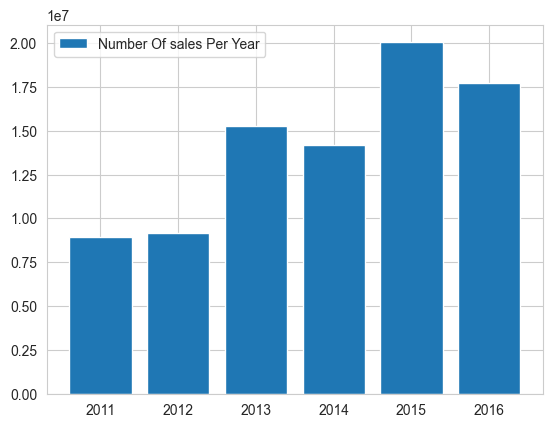

In [21]:
plt.bar(x=df_by_year['Year'], height=df_by_year['Revenue'], label= "Number Of sales Per Year")
plt.plot()
plt.legend()
plt.show()

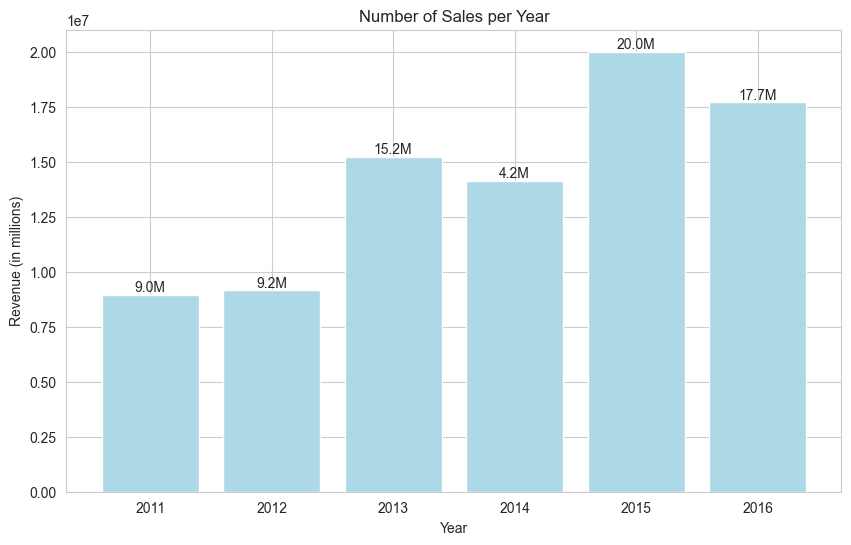

In [26]:
# Data
revenue = [9.0, 9.2, 15.2, 4.2, 20.0, 17.7]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_by_year['Year'], df_by_year['Revenue'], color='lightblue')

# Adding the data values on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{revenue[i]}M', ha='center', va='bottom')

# Setting labels and title
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.title('Number of Sales per Year')

# Displaying the chart
plt.show()
